In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

"""
This notebook makes different manifold learning plots (i.e. t-SNE, Isomap etc.)
to illustrate that those methods are not very useful in visualization of shapes 
in terms of topology, although they are supposed to learn "manifold", LMAO.
"""

import os
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../')
sys.path.append('../paretoviz')
from paretoviz.utils import fmt
from paretoviz.utils import vectorops as vops
from paretoviz import decorator as dcor
from paretoviz import plotting as pplt
from paretoviz.decorator import Arrow3D

rndstate = np.random.RandomState(seed = 123)

# raw data path
c1raw = "../data/carcrash/carcrash-c1/carcrash-c1-3d.out"
c2raw = "../data/carcrash/carcrash-c2/carcrash-c2-3d.out"

c1path, c1rfname = os.path.split(c1raw)
c2path, c2rfname = os.path.split(c2raw)

c1prefix = c1rfname.split('.')[0]
c2prefix = c2rfname.split('.')[0]

# load the normalized data
c1npts = fmt.load(os.path.join(c1path, c1prefix + "-norm.out"))
c2npts = fmt.load(os.path.join(c2path, c2prefix + "-norm.out"))

# calculate tradeoffs
c1mu = [v[0] if len(v) == 1 else v for v in fmt.load(os.path.join(c1path, c1prefix + "-norm-mu.out"))]
c2mu = [v[0] if len(v) == 1 else v for v in fmt.load(os.path.join(c2path, c2prefix + "-norm-mu.out"))]

# resize by tradeoffs
c1s = dcor.rescale_by_tradeoff(c1mu)
c2s = dcor.rescale_by_tradeoff(c2mu)

# recolor by centroid
c1c = dcor.recolor_by_centroid(c1npts, factor = 4.0)
c2c = dcor.recolor_by_centroid(c2npts, factor = 1.5)

# recolor by tradeoff
(c1c, c1kidx) = dcor.recolor_by_tradeoff(c1s, c1c)
(c2c, c2kidx) = dcor.recolor_by_tradeoff(c2s, c2c)

# for scatter plot, use the original objective value
c1rpts = fmt.load(c1raw)
c2rpts = fmt.load(c2raw)

# adjust the point size for better vizualization
rpts = c2rpts + c1rpts
U = np.array(rpts)
c1s = [v * 0.33 for v in c1s]
c2s = [v * 0.33 for v in c2s]
for i in c1kidx:
    c1s[i] = c1s[i] * 3.33
for i in c2kidx:
    c2s[i] = c2s[i] * 3.33
s = c2s + c1s
c = c2c + c1c

# find the centroid of the cluster B
muc2 = vops.mean(c2rpts)
muidx = []
for i in range(len(c2rpts)):
    if vops.distlp(c2rpts[i], muc2) < 0.15:
        muidx.append(i)

# paint the centroid to orange and make it bigger
for i in muidx:
    s[i] = s[i] * 20.0
    c[i] = 'red'

<IPython.core.display.Javascript object>


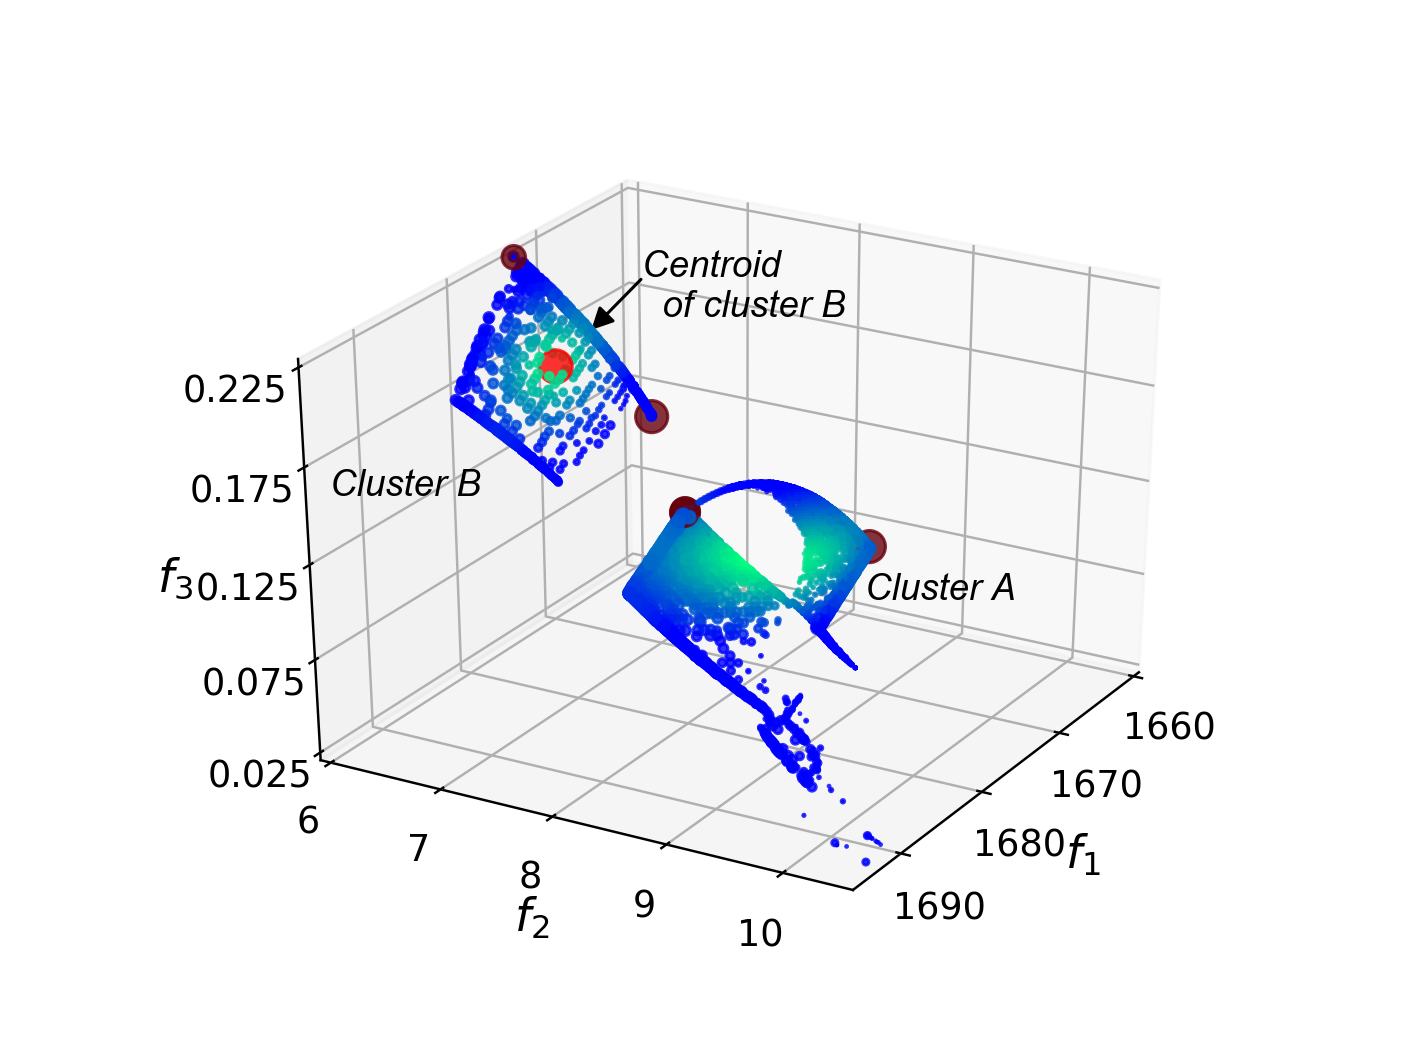

In [2]:
(fig, ax) = pplt.scatter(rpts, s = s, c = c, camera = [30, 30], alpha = [0.2, 0.8], label = r"$f_{:d}$")

# for IEEE CIM
ax.set_xlim(1660, 1695)
ax.set_ylim(6, 10.5)
ax.set_zlim(0.025, 0.225)
ax.set_xticks(ax.get_xticks()[::2])
ax.set_yticks(ax.get_yticks()[::2])
ax.set_zticks(ax.get_zticks()[::2])
ax.xaxis.set_rotate_label(False) 
ax.yaxis.set_rotate_label(False) 
ax.zaxis.set_rotate_label(False) 

# for IEEE CIM
tickfs, textfs = 12, 12
labelfs = round(tickfs * 1.25, 2)
ax.set_xlabel(r"$f_1$", fontname = 'Arial', fontsize = labelfs, style = 'italic')
ax.set_ylabel(r"$f_2$", fontname = 'Arial', fontsize = labelfs, style = 'italic')
ax.set_zlabel(r"$f_3$", fontname = 'Arial', fontsize = labelfs, style = 'italic')
ax.tick_params(labelsize = tickfs)

ax.text(1665, 8.50, 0.050, "Cluster A", \
        fontname = 'Arial', fontsize = textfs, style = 'italic')
ax.text(1700, 6.50, 0.180, "Cluster B", \
        fontname = 'Arial', fontsize = textfs, style = 'italic')
mutxt = "Centroid \n  of cluster B"
ax.text(rpts[muidx[0]][0] - 10, rpts[muidx[0]][1], rpts[muidx[0]][2], mutxt, \
            fontname = 'Arial', fontsize = textfs, style = 'italic')

a = Arrow3D([1665, 1670], [6.5, 6.35], [0.20, 0.18], \
            mutation_scale = 15, lw = 1, arrowstyle = "-|>", color = "black")
ax.add_artist(a)

ofname = "../data/carcrash/carcrash-3d-scatter-combined-centroid.pdf"
plt.savefig(ofname, transparent = False, dpi = 300)

plt.show()

In [11]:
import numpy as np
from sklearn.manifold import TSNE

"""
Do t-SNE on the carcrash data.
"""

tsne = TSNE(n_components = 2, verbose = True, random_state = rndstate)
F = tsne.fit_transform(U).tolist()
fmt.save(F, "../data/carcrash/carcrash-3d-tsne-combined.out")
print("Done.")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4450 samples in 0.002s...
[t-SNE] Computed neighbors for 4450 samples in 0.060s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4450
[t-SNE] Computed conditional probabilities for sample 2000 / 4450
[t-SNE] Computed conditional probabilities for sample 3000 / 4450
[t-SNE] Computed conditional probabilities for sample 4000 / 4450
[t-SNE] Computed conditional probabilities for sample 4450 / 4450
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.167542
[t-SNE] KL divergence after 1000 iterations: 0.320953
Done.


<IPython.core.display.Javascript object>


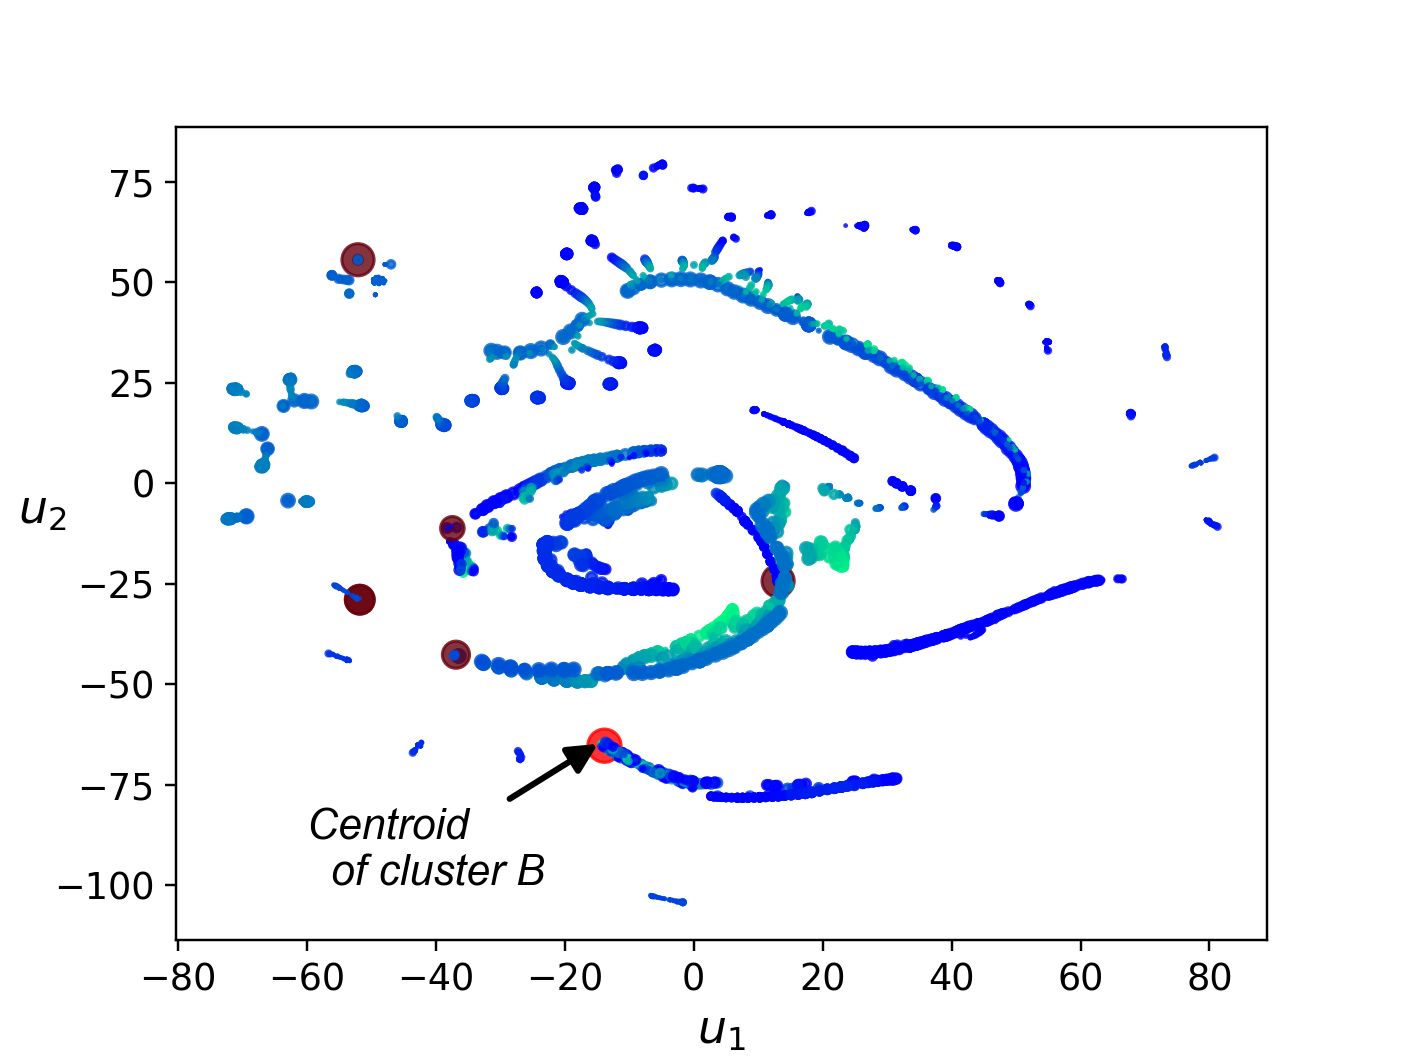

In [64]:
# for IEEE CIM
tickfs, textfs = 12, 14
labelfs = round(tickfs * 1.25, 2)

# now plot the t-SNE data points
f = fmt.load("../data/carcrash/carcrash-3d-tsne-combined.out")
(fig, ax) = pplt.scatter(f, s = s, c = c, alpha = [0.2, 0.8], label = r'$u_{:d}$')

# for IEEE CIM
ax.set_xlabel(r"$u_1$", fontname = 'Arial', fontsize = labelfs, style = 'italic', rotation = 0)
ax.set_ylabel(r"$u_2$", fontname = 'Arial', fontsize = labelfs, style = 'italic', rotation = 0)
ax.tick_params(labelsize = tickfs)

# ax.text(f[muidx[0]][0] + 10, f[muidx[0]][1] - 5, mutxt)
# ax.text(-60, -100, mutxt, fontname = 'Arial', fontsize = textfs, style = 'italic')
# ax.arrow(-33, -85, 13, 15, width = 0.1, color = "k", head_width = 3)
ax.annotate(s = mutxt, xy = (-14, -64), xytext = (-60, -100), \
            arrowprops = dict(facecolor = "black", arrowstyle = "-|>", linewidth = 2.0, mutation_scale = 20.0), \
            fontname = 'Arial', fontsize = textfs, style = 'italic')

outfile = "../data/carcrash/carcrash-3d-norm-tsne-combined.pdf"
plt.savefig(outfile, transparent = False, dpi = 300)

plt.show()

In [4]:
from sklearn.manifold import Isomap

"""
Do isomap on the carcrash data.
"""

isomap = Isomap(n_components = 2)
F = isomap.fit_transform(U).tolist()
fmt.save(F, "../data/carcrash/carcrash-3d-isomap-combined.out")
print("Done.")

Done.


<IPython.core.display.Javascript object>


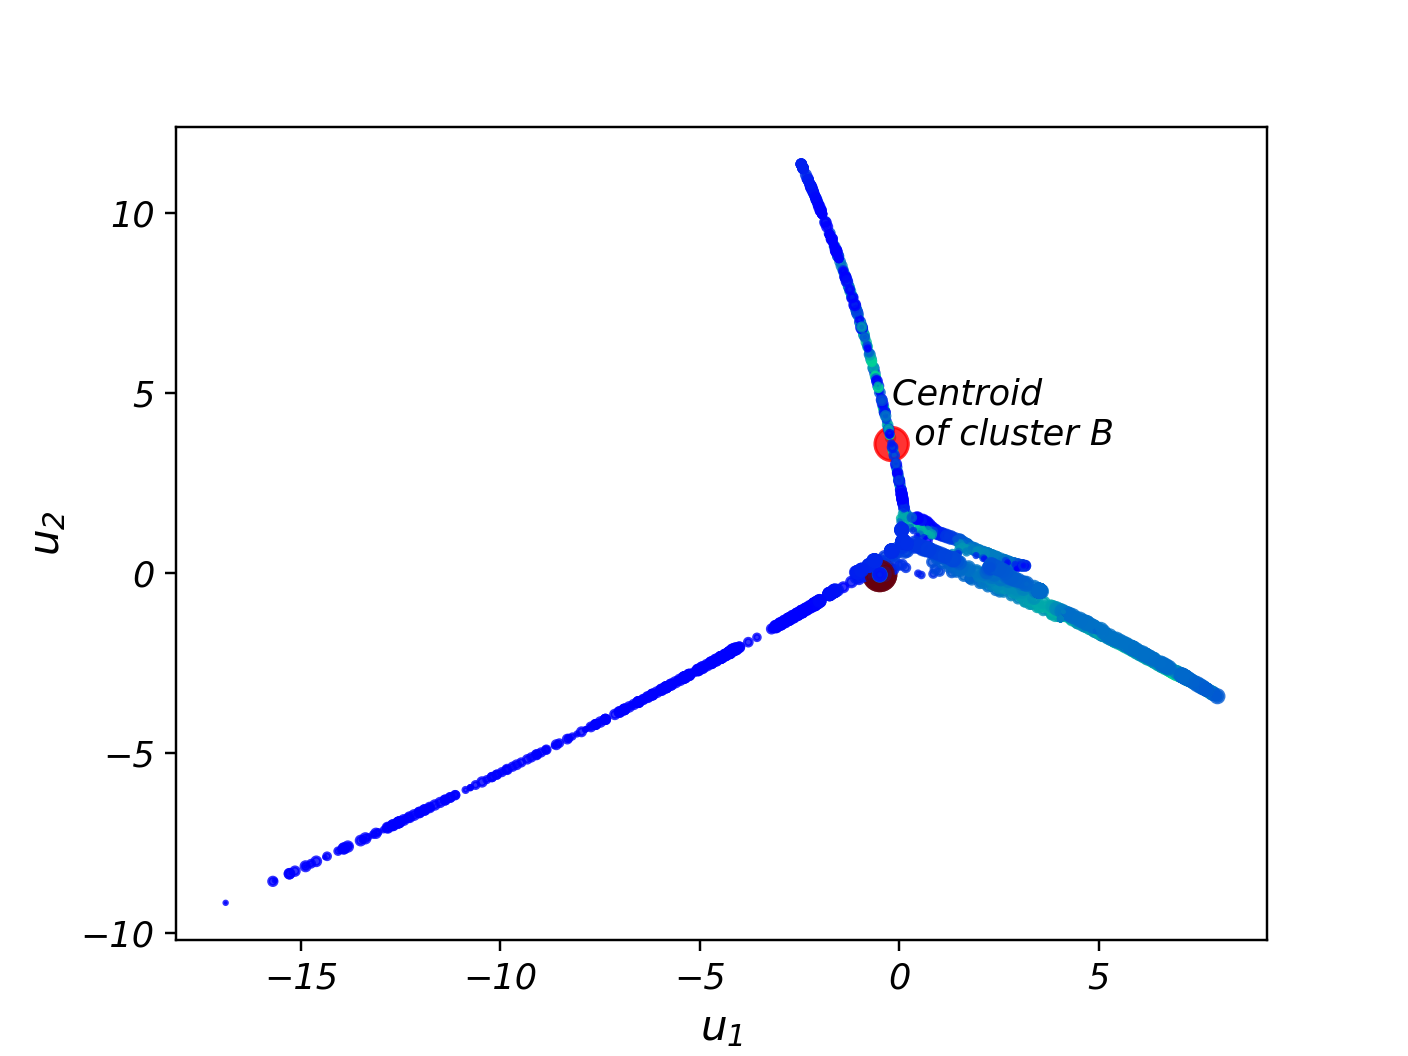

In [8]:
# now plot the isomap data points

f = fmt.load("../data/carcrash/carcrash-3d-isomap-combined.out")

(fig, ax) = pplt.scatter(f, s = s, c = c, alpha = [0.2, 0.8], label = r'$u_{:d}$')
ax.text(f[muidx[0]][0], f[muidx[0]][1], mutxt)

outfile = "../data/carcrash/carcrash-3d-isomap-combined.pdf"
plt.savefig(outfile, transparent = False, dpi = 300)

plt.show()

In [7]:
from sklearn.manifold import LocallyLinearEmbedding

"""
Do Locally Linear Embedding (LLE) on the carcrash data.
"""

lle = LocallyLinearEmbedding(n_components = 2, eigen_solver = 'dense', random_state = rndstate)
F = lle.fit_transform(U).tolist()
fmt.save(F, "../data/carcrash/carcrash-3d-lle-combined.out")
print("Done.")

Done.


<IPython.core.display.Javascript object>


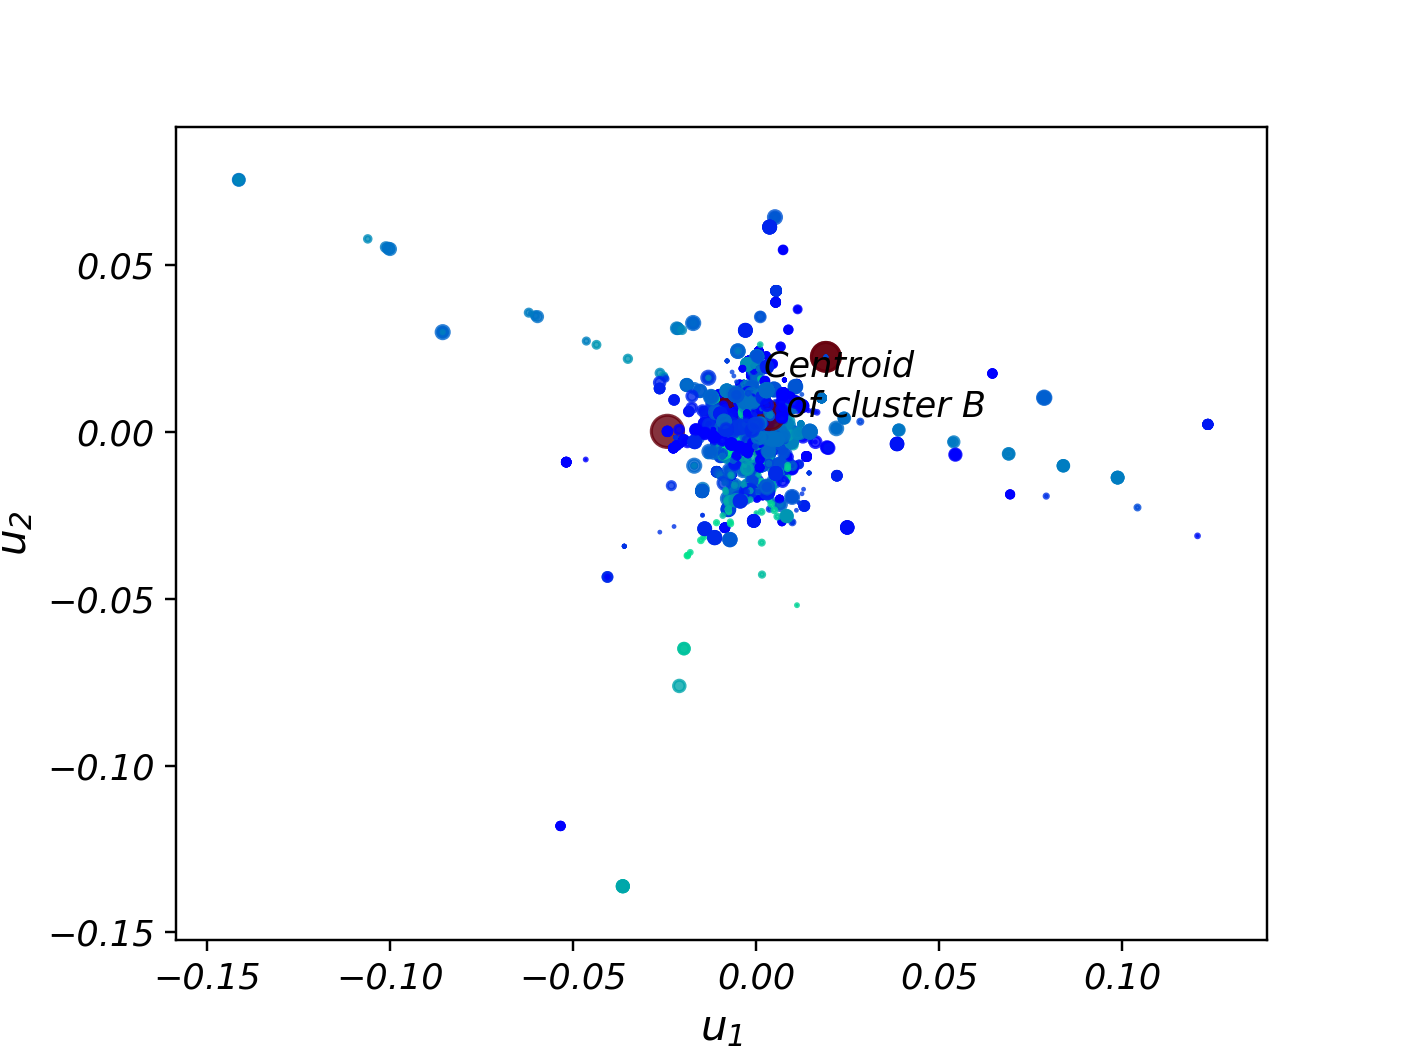

In [9]:
# now plot the LLE data points

f = fmt.load("../data/carcrash/carcrash-3d-lle-combined.out")

(fig, ax) = pplt.scatter(f, s = s, c = c, alpha = [0.2, 0.8], label = r'$u_{:d}$')
ax.text(f[muidx[0]][0], f[muidx[0]][1], mutxt)

outfile = "../data/carcrash/carcrash-3d-lle-combined.pdf"
plt.savefig(outfile, transparent = False, dpi = 300)

plt.show()

In [9]:
from sklearn.manifold import SpectralEmbedding

"""
Do Spectral Embedding (SE) on the carcrash data.
"""

se = SpectralEmbedding(n_components = 2, random_state = rndstate)
F = se.fit_transform(U).tolist()
fmt.save(F, "../data/carcrash/carcrash-3d-se-combined.out")
print("Done.")

Done.


<IPython.core.display.Javascript object>


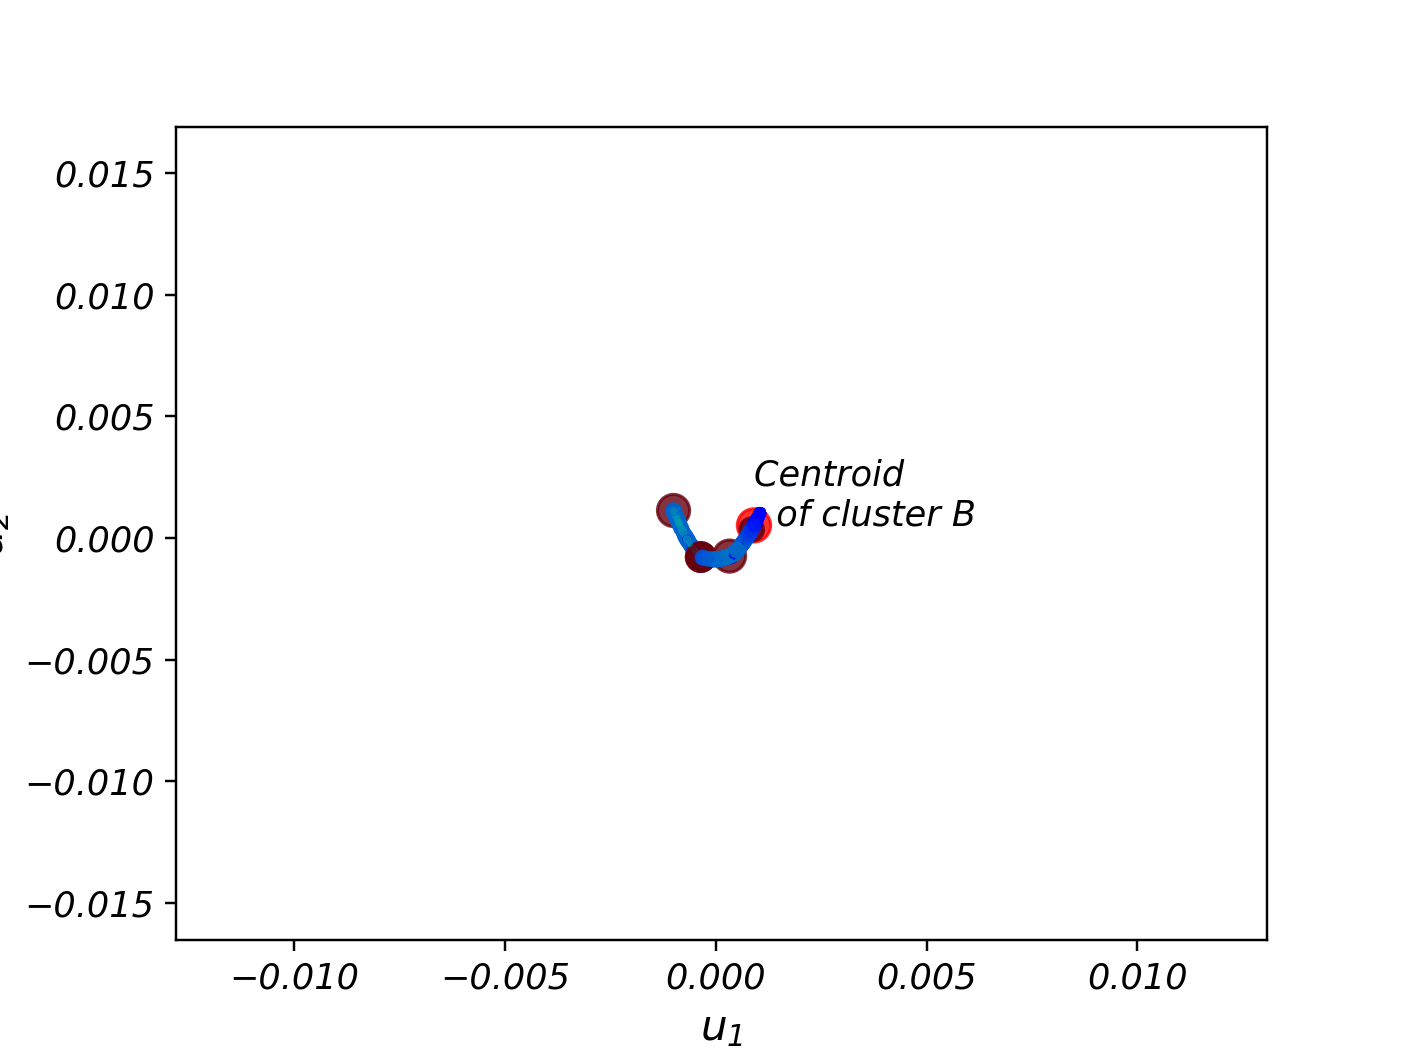

In [10]:
# now plot the SE data points

f = fmt.load("../data/carcrash/carcrash-3d-se-combined.out")

(fig, ax) = pplt.scatter(f, s = s, c = c, alpha = [0.2, 0.8], label = r'$u_{:d}$')
ax.text(f[muidx[0]][0], f[muidx[0]][1], mutxt)

outfile = "../data/carcrash/carcrash-3d-se-combined.pdf"
plt.savefig(outfile, transparent = False, dpi = 300)

plt.show()

In [11]:
from sklearn.manifold import MDS

"""
Do Multidimensional Scaling (MDS) on the carcrash data.
"""

mds = MDS(n_components = 2, random_state = rndstate, verbose = 2)
F = mds.fit_transform(U).tolist()
fmt.save(F, "../data/carcrash/carcrash-3d-mds-combined.out")
print("Done.")

it: 0, stress 719593501.070258
it: 1, stress 280780670.81625855
it: 2, stress 217693560.35018954
it: 3, stress 194735009.62465388
it: 4, stress 186303919.08636674
it: 5, stress 182891539.69828492
it: 6, stress 181026601.3454977
it: 7, stress 179646930.07400146
it: 8, stress 178242970.68932447
it: 9, stress 176384984.9808797
it: 10, stress 173634916.68788442
it: 11, stress 169486990.92074665
it: 12, stress 163430927.26153618
it: 13, stress 155106614.8164382
it: 14, stress 144382718.97737232
it: 15, stress 131608184.04848626
it: 16, stress 117795835.48277493
it: 17, stress 104042453.7485556
it: 18, stress 90860354.60818337
it: 19, stress 78445657.78769043
it: 20, stress 67081290.30976633
it: 21, stress 56937334.91573718
it: 22, stress 48081106.48353916
it: 23, stress 40462046.91776497
it: 24, stress 33938965.33942645
it: 25, stress 28368774.83585198
it: 26, stress 23639113.168510616
it: 27, stress 19648949.59794063
it: 28, stress 16295937.472058678
it: 29, stress 13486816.207628628
it: 3

it: 240, stress 97949.13295973017
it: 241, stress 97402.95476020862
it: 242, stress 96859.99347118191
it: 243, stress 96317.37541531086
it: 244, stress 95769.10263241851
it: 245, stress 95213.54978011003
it: 246, stress 94648.02965484325
it: 247, stress 94078.16543200023
it: 248, stress 93511.19519358304
it: 249, stress 92950.0734980212
it: 250, stress 92393.15673014366
it: 251, stress 91840.35349695479
it: 252, stress 91289.45417158902
it: 253, stress 90736.65641363605
it: 254, stress 90173.60252245136
it: 255, stress 89600.1137409304
it: 256, stress 89016.89173838247
it: 257, stress 88422.67634309418
it: 258, stress 87821.81069785434
it: 259, stress 87221.13687367649
it: 260, stress 86622.95441728838
it: 261, stress 86023.17078495033
it: 262, stress 85424.11263384597
it: 263, stress 84830.29862512584
it: 264, stress 84247.01158297855
it: 265, stress 83683.59928652762
it: 266, stress 83148.98177528869
it: 267, stress 82647.56522697576
it: 268, stress 82175.7763248715
it: 269, stress 8

it: 182, stress 188272.6841548426
it: 183, stress 187091.047796091
it: 184, stress 185938.62657950722
it: 185, stress 184815.4623094381
it: 186, stress 183720.74886085227
it: 187, stress 182650.90450854757
it: 188, stress 181598.69604003904
it: 189, stress 180559.55406744056
it: 190, stress 179531.28562881186
it: 191, stress 178501.92201713278
it: 192, stress 177470.92330738262
it: 193, stress 176441.01555086035
it: 194, stress 175416.565745691
it: 195, stress 174398.10420848813
it: 196, stress 173387.49911950482
it: 197, stress 172383.39358724942
it: 198, stress 171380.40203631046
it: 199, stress 170371.61719900116
it: 200, stress 169357.0959038664
it: 201, stress 168335.56483010648
it: 202, stress 167301.7483319187
it: 203, stress 166261.35940266476
it: 204, stress 165219.23351384434
it: 205, stress 164172.16690032702
it: 206, stress 163119.92413626725
it: 207, stress 162071.339610474
it: 208, stress 161031.60499799647
it: 209, stress 160005.58819467042
it: 210, stress 158986.7268123

it: 122, stress 206019.10503990052
it: 123, stress 204735.6979808672
it: 124, stress 203460.54859119141
it: 125, stress 202191.48569603876
it: 126, stress 200927.9972656953
it: 127, stress 199670.43848683697
it: 128, stress 198415.7449506863
it: 129, stress 197155.02363939243
it: 130, stress 195894.87717051455
it: 131, stress 194638.3269980583
it: 132, stress 193386.1778024584
it: 133, stress 192143.08974774976
it: 134, stress 190908.98982099144
it: 135, stress 189686.25710491717
it: 136, stress 188478.5086285532
it: 137, stress 187289.37733572387
it: 138, stress 186121.10308147423
it: 139, stress 184974.21006362356
it: 140, stress 183847.12918428777
it: 141, stress 182739.77920786347
it: 142, stress 181649.00484914787
it: 143, stress 180570.88833644328
it: 144, stress 179505.9239607419
it: 145, stress 178452.42335367046
it: 146, stress 177410.65790157378
it: 147, stress 176381.59897371393
it: 148, stress 175362.34387857976
it: 149, stress 174349.20397283387
it: 150, stress 173339.7417

it: 62, stress 443136.3615680475
it: 63, stress 433505.79211486544
it: 64, stress 424693.12705842237
it: 65, stress 416602.25968305545
it: 66, stress 409150.52721954073
it: 67, stress 402264.41901752393
it: 68, stress 395881.44722349313
it: 69, stress 389947.34154270275
it: 70, stress 384412.79116534605
it: 71, stress 379233.8949697821
it: 72, stress 374369.8464131794
it: 73, stress 369783.6120381731
it: 74, stress 365442.65614236967
it: 75, stress 361317.9566901392
it: 76, stress 357382.4694908852
it: 77, stress 353611.86535180995
it: 78, stress 349984.4282710665
it: 79, stress 346479.39539175987
it: 80, stress 343081.3521535627
it: 81, stress 339775.6398287562
it: 82, stress 336546.1257186788
it: 83, stress 333379.3021917658
it: 84, stress 330264.52580049774
it: 85, stress 327193.3092792106
it: 86, stress 324155.8014796102
it: 87, stress 321142.7101804313
it: 88, stress 318149.62020020344
it: 89, stress 315170.06108186895
it: 90, stress 312201.2683665595
it: 91, stress 309240.0536567

<IPython.core.display.Javascript object>


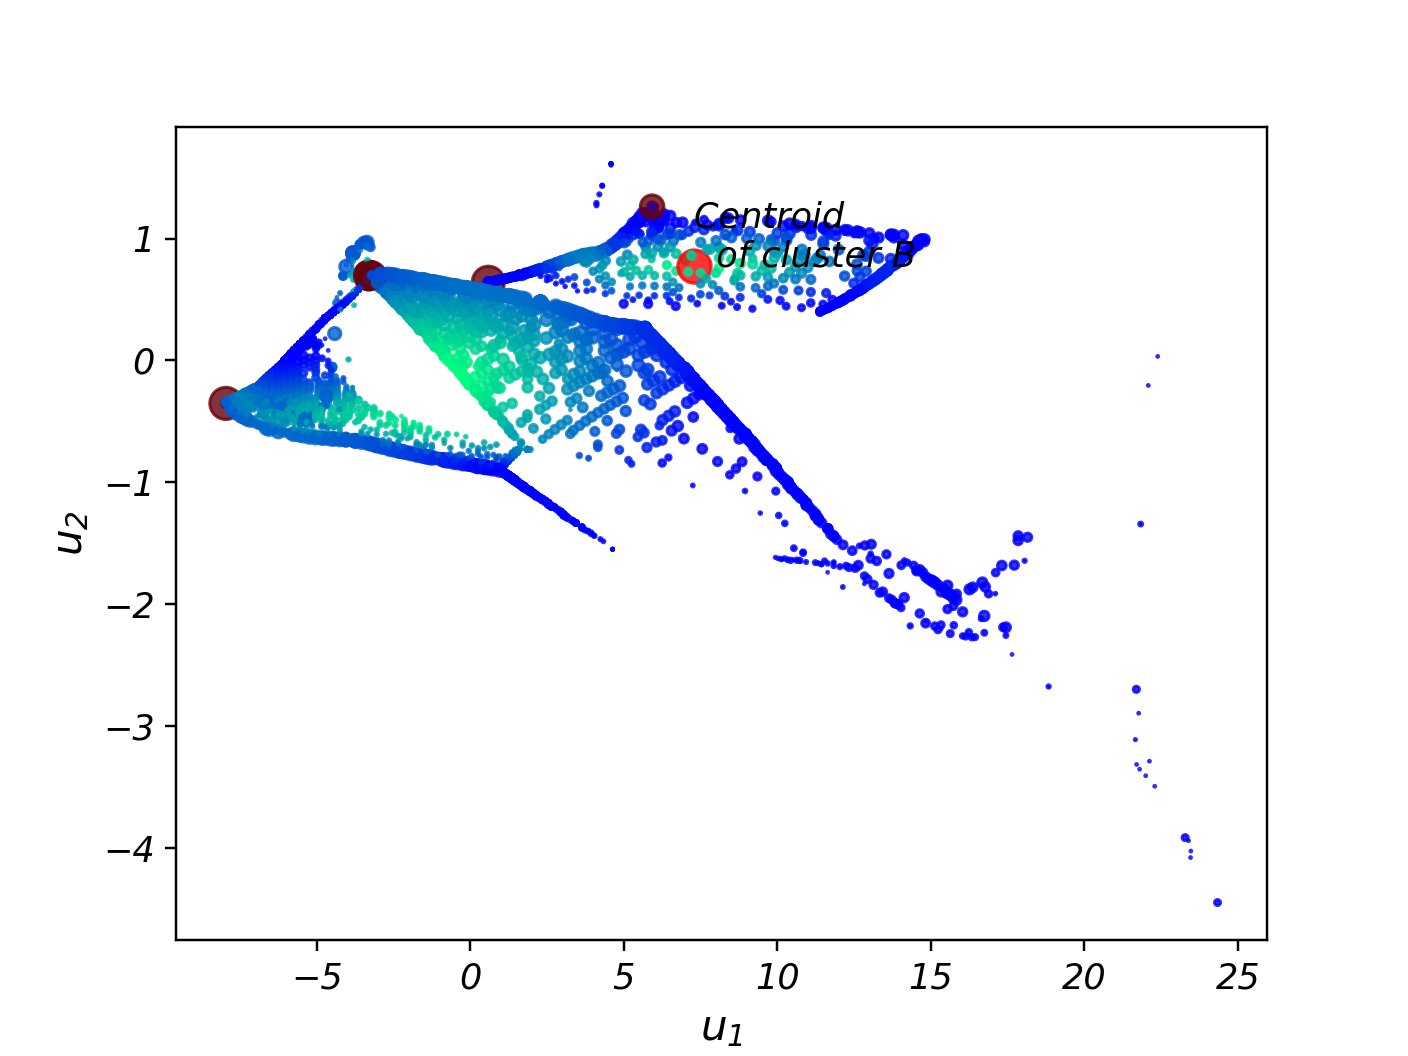

In [12]:
# now plot the MDS data points

f = fmt.load("../data/carcrash/carcrash-3d-mds-combined.out")

(fig, ax) = pplt.scatter(f, s = s, c = c, alpha = [0.2, 0.8], label = r'$u_{:d}$')
ax.text(f[muidx[0]][0], f[muidx[0]][1], mutxt)

outfile = "../data/carcrash/carcrash-3d-mds-combined.pdf"
plt.savefig(outfile, transparent = False, dpi = 300)

plt.show()